In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initialization complete


In [3]:
ramp_voltages(SRC=1.5/8, LB=3.72/8, RB=3.28/8, TG=14.4/8, TGAC=-6.3/8, DF=3.905/8, DS=5.17945/8)

In [3]:

def ramp_voltages(target_voltage=None, channels=None, **kwargs):
    """
    Ramp multiple gates in multiple steps.
    
    Note that voltage_parameters must contain the parameters to be varied
    
    Usage:
        ramp_voltages(target_voltage)
            Ramp voltages of all gates to target_voltage
        ramp_voltages(target_voltage, channels)
            Ramp voltages of gates with names in channels to target_voltage
        ramp_voltages(gate1=val1, gate2=val2, ...)
            Ramp voltage of gate1 to val1, gate2 to val2, etc.
            
    Args:
        target_voltage (int): target voltage (can be omitted)
        channels (str list): Names of gates to be ramped (can be omitted)
        use_scaled: Use scaled SIM parameter (SIM900_scaled_parameters)
        **kwargs: 

    Returns:
        None
    """
    parameters = {param.name: param for param in voltage_parameters}

    if target_voltage is not None:
        if channels is None:
            channels = kwargs.keys()
        target_voltages = {parameters[channel]: target_voltage
                           for channel in channels}
    elif kwargs:
        target_voltages = {parameters[key]: val for key, val in kwargs.items()}

    initial_voltages = {channel: parameters[channel]() for channel in channels}

    for ratio in np.linspace(0, 1, 11):
        for channel in target_voltages:
            voltage = (1 - ratio) * initial_voltages[channel] + \
                      ratio * target_voltages[channel]
            parameters[channel](voltage)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

<IPython.core.display.Javascript object>


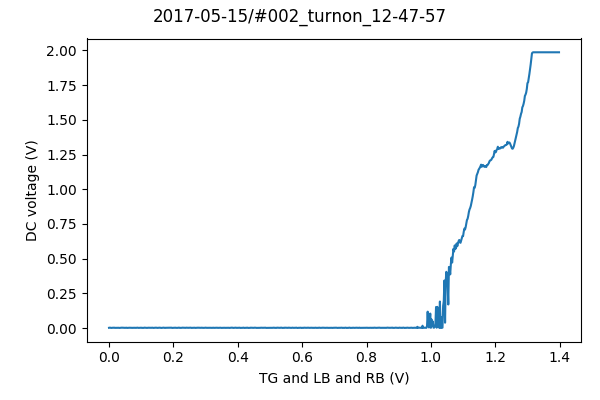

DataSet:
   data = load_data('2017-05-15/#002_turnon_12-47-57')
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-15 12:47:57


In [5]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

# Pinchoff

In [2]:
pinchoff_parameter = LB

vals = list(np.arange(1.25, 0, -0.002))

turnon_parameter(vals[0])
len(vals)

625

<IPython.core.display.Javascript object>


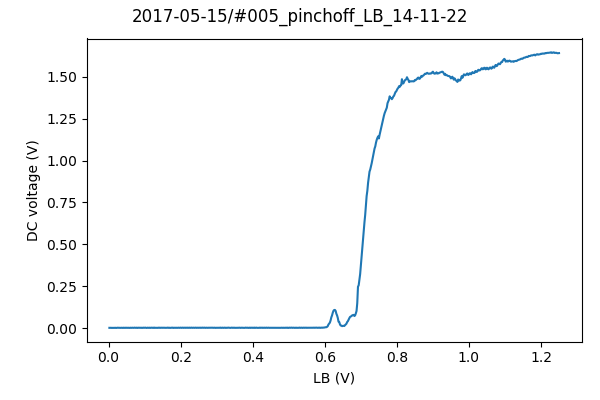

DataSet:
   data = load_data('2017-05-15/#005_pinchoff_LB_14-11-22')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LB_set     | LB           | (625,)
   Measured | DC_voltage | DC_voltage   | (625,)
started at 2017-05-15 14:11:22


In [3]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

# 1D Coulomb

In [4]:
vals = TG.sweep(1.4, 1.9, step=0.0008)

<IPython.core.display.Javascript object>


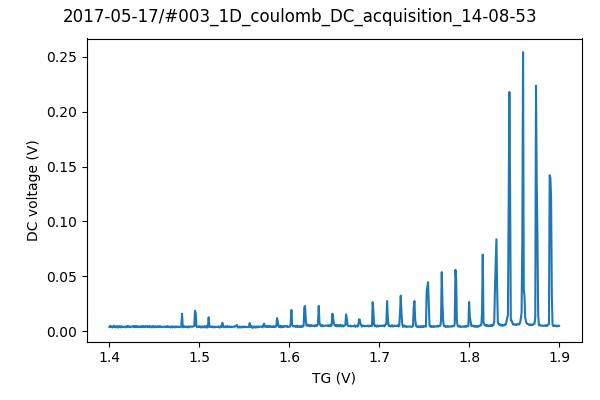

DataSet:
   data = load_data('2017-05-17/#003_1D_coulomb_DC_acquisition_14-08-53')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (626,)
   Measured | DC_voltage | DC_voltage   | (626,)
started at 2017-05-17 14:08:53


In [7]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

In [36]:

step_vals = np.arange(-0.15, 0.16, 0.05)
offset = (0.55, 0.55)

barrier_vals = np.zeros((2, len(step_vals)))
for k, step in enumerate(step_vals):
    barrier_vals[0,k] = offset[0] + step
    barrier_vals[1, k] = offset[1] - step

barrier_vals = barrier_vals.transpose()

In [49]:

step = 0.04
offset_vals = np.arange(0.35, 0.551, 0.05)

barrier_vals = np.zeros((2, len(offset_vals)))
for k, offset in enumerate(offset_vals):
    barrier_vals[0,k] = offset + step
    barrier_vals[1, k] = offset - step

barrier_vals = barrier_vals.transpose()

In [51]:
DC_parameter.setup()
loop = Loop(TG.sweep(1.15, 1.9, num=7)).loop(
    combine(LB, RB, name='LB_RB').sweep(barrier_vals)).loop(
        parameter[vals]).each(
            DC_parameter)
data = loop.get_data_set(name=f'TG_LB_RB_coulomb_{parameter.name}')
loop.run();

layout.stop()
# parameter(vals[0])

DataSet:
   data = load_data('2017-05-15/#029_TG_LB_RB_coulomb_DF_DS_20-58-23')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (7,)
   Setpoint | LB_RB_set  | LB_RB        | (7, 5)
   Setpoint | DF_DS_set  | DF_DS        | (7, 5, 900)
   Measured | DC_voltage | DC_voltage   | (7, 5, 900)
   Measured | LB         | LB           | (7, 5)
   Measured | RB         | RB           | (7, 5)
started at 2017-05-15 20:58:23


# 2D scans

In [11]:
x_vals = DF.sweep(0, 1, step=0.001)
y_vals = TGAC.sweep(-0.4, 0.4, step=0.001)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X1001 x Y801


<IPython.core.display.Javascript object>


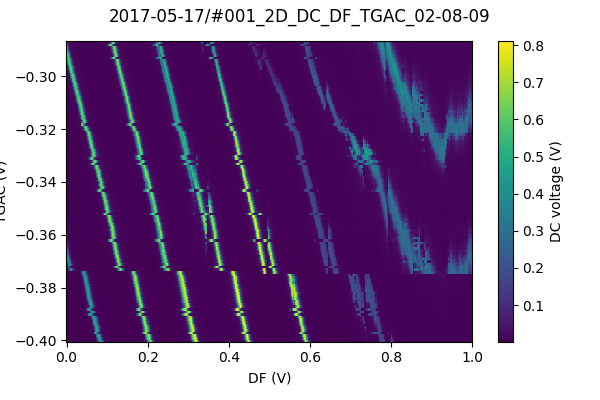

DataSet:
   data = load_data('2017-05-17/#001_2D_DC_DF_TGAC_02-08-09')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (801,)
   Setpoint | DF_set     | DF           | (801, 1001)
   Measured | DC_voltage | DC_voltage   | (801, 1001)
started at 2017-05-17 02:08:09


KeyboardInterrupt: 

In [12]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop.actions[0].plot(data.DC_voltage)
loop.run()

layout.stop()

# Continuous single point scan

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Testing

In [8]:
DC_sweep_parameter = DCSweepParameter(sweep_name='TGAC')
DC_sweep_parameter.pulse_settings['connection_label'] = 'TGAC'

DC_sweep_parameter.sweep_voltages = np.linspace(-0.03, 0.03, 500)

In [2]:
from silq.parameters.acquisition_parameters import AcquisitionParameter
from silq.tools.general_tools import SettingsClass, clear_single_settings, \
    attribute_from_config
    
class DCSweepParameter(AcquisitionParameter):
    def __init__(self, sweep_name=None, **kwargs):
        super().__init__(name='DC_acquisition',
                         names=['DC_voltage'],
                         labels=['DC voltage'],
                         snapshot_value=False,
                         setpoint_names=((sweep_name,),),
                         setpoint_labels=((sweep_name,),),
                         shapes=((1,),),
                         **kwargs)

        self.pulse_settings = {'duration': 20}

        self.additional_pulses = []
        self._sweep_voltages = []
        self.sweep_pulse_names = []
        self.sweep_name = sweep_name
        self.samples = 1

    @property
    def sweep_voltages(self):
        return self._sweep_voltages

    @sweep_voltages.setter
    def sweep_voltages(self, sweep_voltages):
        self._sweep_voltages = sweep_voltages
        self.pulse_sequence.clear()

        self.pulse_sequence.add(*[
            DCPulse('DC_read'.format(sweep_voltage),
                    acquire=True,
                    amplitude=sweep_voltage,
                    **self.pulse_settings)
            for sweep_voltage in sweep_voltages])
        self.pulse_sequence.add(
            DCPulse(name='final',
                    connection_label=self.pulse_settings['connection_label']))

        self.pulse_sequence.add(*self.additional_pulses)

        # Update metadata
        self.shapes = tuple((len(sweep_voltages),))
        self.setpoints = (tuple(sweep_voltages), )

    @clear_single_settings
    def get(self):
        self.setup()
        self.acquire(average_mode='point')
        self.results = [self.trace_segments['output'][f'DC_read[{k}]']
                        for k in range(len(self.sweep_voltages))]
        return self.results
